<a href="https://colab.research.google.com/github/panimesh14/Autoencoders-Unsupervised-Learning/blob/main/Dimensionality_Reduction_using_Autoencoders_%3AAn_Application_to_UK_nations_Diet_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder for Dimensionality Reduction: Application to Identify Nations by Diet Patterns in UK nations

In [137]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [108]:
#Data Loading
filename='UK_foods.csv'
def data_loadcsv(filename,index_data=False):
    if(index_data):
       data=pd.read_csv(filename,index_col=index_data)
       return data
    data=pd.read_csv(filename)
    return data

In [109]:
df=data_loadcsv(filename)

In [110]:
#Data Profiling
df.head(5)

,Unnamed: 0,England,Wales,Scotland,N.Ireland
0,Cheese,105,103,103,66
1,Carcass_meat,245,227,242,267
2,Other_meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats_and_oils,193,235,184,209


In [111]:
data=data_loadcsv(filename,'Unnamed: 0')
data.head()

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


In [112]:
data=data.T
data.head()#Since difference to be found amongst nations

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, England to N.Ireland
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Cheese               4 non-null      int64
 1   Carcass_meat         4 non-null      int64
 2   Other_meat           4 non-null      int64
 3   Fish                 4 non-null      int64
 4   Fats_and_oils        4 non-null      int64
 5   Sugars               4 non-null      int64
 6   Fresh_potatoes       4 non-null      int64
 7   Fresh_Veg            4 non-null      int64
 8   Other_Veg            4 non-null      int64
 9   Processed_potatoes   4 non-null      int64
 10  Processed_Veg        4 non-null      int64
 11  Fresh_fruit          4 non-null      int64
 12  Cereals              4 non-null      int64
 13  Beverages            4 non-null      int64
 14  Soft_drinks          4 non-null      int64
 15  Alcoholic_drinks     4 non-null      int64
 16  Confectionery        

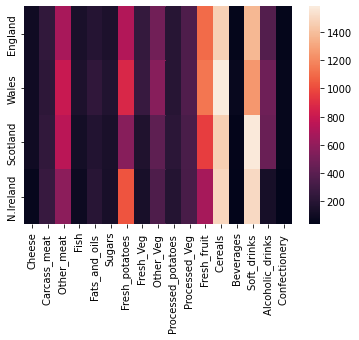

In [114]:
#Data Preparation
sns.heatmap(data)
#A lot of distinctions in diet habits visible from data
#Northern Ireland's consumption of fresh fruit and fresh potatoes is high
#Wales has higher consumption of soft drinks
#Scotland and England seem quite similar on most parameters
#Wales and Northern Ireland show relatively high dissimilarities from the rest
#Can be inferred that there is a difference in dietary habits amongst given UK nations

In [115]:
data.isna()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Wales,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Scotland,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
N.Ireland,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [116]:
data.isna().nunique()
#No null values

Cheese                 1
Carcass_meat           1
Other_meat             1
Fish                   1
Fats_and_oils          1
Sugars                 1
Fresh_potatoes         1
Fresh_Veg              1
Other_Veg              1
Processed_potatoes     1
Processed_Veg          1
Fresh_fruit            1
Cereals                1
Beverages              1
Soft_drinks            1
Alcoholic_drinks       1
Confectionery          1
dtype: int64

In [117]:
#Data Scaling and Normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data)
df_scaled=scaler.transform(data)

In [118]:
#Autoencoder Model for Dimensionality Reduction

#Autoencoder Model for Dimensionality Reduction

In [127]:
#Encoder/Decoder
#Use layeractivation=None for linear output or maybe last output if need be
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
def ae_encoder(layers,layerwidth,layeractivation):
    enc=Sequential()
    enc.add(Dense(layerwidth[0],activation=layeractivation[0],input_shape=[17]))
    for n in range(1,layers):
        enc.add(Dense(layerwidth[n],activation=layeractivation[n]))
    return enc
def ae_decoder(layers,layerwidth,layeractivation):
    dec=Sequential()
    dec.add(Dense(layerwidth[layers-1],activation=layeractivation[layers-1],input_shape=[layerwidth[layers-1]]))
    for n in range(layers-2,-1):
        dec.add(Dense(layerwidth[n],activation=layeractivation[n]))
    dec.add(Dense(17,activation='relu'))
    return dec

In [129]:
#Autoencoder for Dimensionality Reduction here
def autoencdec(layers,layerwidth,layeractivation,loss=False,optimizer=False):#Symmetric
    encoder=ae_encoder(layers,layerwidth,layeractivation)
    decoder=ae_decoder(layers,layerwidth,layeractivation)
    #print('Correct')
    autoenc=Sequential([encoder,decoder])
    if((loss) and (optimizer)):
       autoenc.compile(loss=loss,optimizer=optimizer)
       #autoenc.layers[1].summary()
    return autoenc
#Check model compilation according to need although  it can be included here

In [130]:
#Autoencoder parameters for data
layers=3;
layerwidth=[8,4,2];#Encoding all dimensions into 2 for easy visualization 
layeractivation=['relu','relu','relu'];
loss='mse';
optimizers='adam';
autoencoder=autoencdec(layers,layerwidth,layeractivation,loss,optimizers)
autoencoder

In [135]:
#Model fitting
#df_scaled_tf=tf.data.Dataset.from_tensor_slices(df_scaled);
autoencoder.fit(df_scaled,df_scaled,epochs=10)
encoder,decoder=autoencoder.layers
dimred_enc=encoder.predict(df_scaled)#Dimensionality Reduction
dimred_enc

Epoch 1/10
1/1 [==============================] - 0s 12ms/step - loss: 0.3641
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 0.3631
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.3622
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 0.3614
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 0.3606
Epoch 6/10
1/1 [==============================] - 0s 13ms/step - loss: 0.3598
Epoch 7/10
1/1 [==============================] - 0s 15ms/step - loss: 0.3591
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 0.3583
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.3577
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 0.3570


array([[0.        , 1.6033884 ],
       [0.09475409, 1.9916492 ],
       [0.05169087, 1.6041293 ],
       [0.39843127, 0.85243464]], dtype=float32)

In [143]:
df_scaled_ae=pd.DataFrame(dimred_enc,index=data.index,columns=['C1','C2'])
df_scaled_ae

,C1,C2
England,0.000000,1.603388
Wales,0.094754,1.991649
Scotland,0.051691,1.604129
N.Ireland,0.398431,0.852435


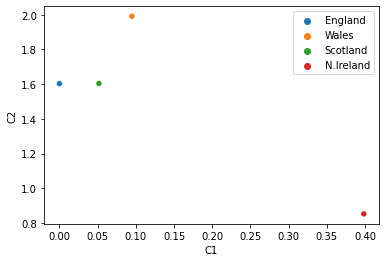

In [154]:
sns.scatterplot(x='C1',y='C2',data=df_scaled_ae,hue=df_scaled_ae.index)


#####Dimensionality reduction here with Autoencoder, improves visual distinction ability and seems to Cluster similar nations together.
#####As inferred,Northern Ireland shows distinct diet patterns compared to other nations in UK
#####Wales also shows disparity in diet with respect to other given UK nations
#####Scotand and England are very similar in their diet patterns as compared to other given nations here

In [163]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(df_scaled)
df_scaled_pca=pca.transform(df_scaled)
df_scaled_pca

array([[-0.42432646,  0.12784027],
       [-1.74739108, -0.65671622],
       [ 0.2283678 ,  1.23679728],
       [ 1.94334973, -0.70792133]])

In [164]:
df_scaled_pca=pd.DataFrame(df_scaled_pca,index=data.index,columns=['C1_pca','C2_pca'])
df_scaled_pca

,C1_pca,C2_pca
England,-0.424326,0.127840
Wales,-1.747391,-0.656716
Scotland,0.228368,1.236797
N.Ireland,1.943350,-0.707921


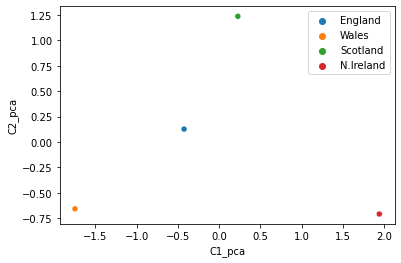

In [165]:
sns.scatterplot(x='C1_pca',y='C2_pca',data=df_scaled_pca,hue=df_scaled_pca.index)

#####PCA components assert the same inference as the Autoencoder with the 2 components corresponding to England and Wales being closer to 0 and showing less variance with respect to C1 parameter. 
#####Wales and Northern Ireland show a vast difference as their distance from origin increases with respect to both parameters but seem to present some commonality with respect to C2 parameter.
##### However no clearcut decision boundary or clustering appears between the nations to distinctly mark similarity or disparity in diet between the UK nations unlike Auto-Encoder above.